In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.utils.data
import torchvision
from torchvision import transforms
from PIL import Image

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from skorch import NeuralNet

from sklearn.datasets import make_regression
from skorch import NeuralNetRegressor



In [2]:
cifar_data = torchvision.datasets.CIFAR10('data/cifar-10/', train=True, download=True)
cifar_testing = torchvision.datasets.CIFAR10('data/cifar-10/', train=False, download=True)


Files already downloaded and verified
Files already downloaded and verified


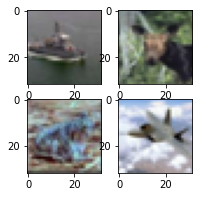

In [3]:
# visualizing 4 random images
fig = plt.figure(figsize=(3,3))
cols, rows = 2, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(cifar_data), size=(1,)).item()
    img, label = cifar_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap="gray")
plt.show()

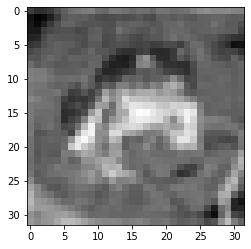

In [4]:
#U, sigma, V = np.linalg.svd(cifar_data[0])
img, label = cifar_data[0]
g_img = img.convert('LA')
plt.figure(figsize=(6, 4))
plt.imshow(g_img) # plot image onto 


In [5]:
x = np.array(list(g_img.getdata(band=0)), float)
g_img = img.convert('LA')


In [11]:
# search for existing data
try:
    print('Finding Existing Data')
    image_matrices = np.load('data/Matrix_gens/cifar_10_data_2/cifar_10_mat.npy')
    image_singular = np.load('data/Matrix_gens/cifar_10_data_2/cifar_10_singular.npy')
    ranks = np.load('data/Matrix_gens/cifar_10_data_2/cifar_10_ranks.npy')
    image_U = np.load('data/Matrix_gens/cifar_10_data_2/cifar_10_U.npy')
    image_V = np.load('data/Matrix_gens/cifar_10_data_2/cifar_10_V.npy')

    test_image_U = np.load('data/Matrix_gens/cifar_10_data/cifar_10_tests_U.npy')
    test_image_V = np.load('data/Matrix_gens/cifar_10_data/cifar_10_tests_V.npy')
    test_image_matrices = np.load('data/Matrix_gens/cifar_10_data/cifar_10_tests.npy')
    test_image_singular = np.load('data/Matrix_gens/cifar_10_data/cifar_10_tests_singular.npy')
    print('Data Found')
except:
    # placing values of image into matrices

    # arrays only used for integration  
    print('Data not found... Creating NP Arrays')
    arr_mat = []
    arr_singular = []
    arr_U = []
    arr_V = []
    arr_ranks = []

    for i in range(len(cifar_data)):
        img, label = cifar_data[i]
        g_img = img.convert('LA')
        x = list(img.getdata(band=0))

        matrix = np.array(x, float)
        matrix.shape = (g_img.size[1], g_img.size[0])
        matrix = np.matrix(matrix)

        # svd and rank of image
        U, sigma, V = np.linalg.svd(matrix) # computes the SVD
        rank = np.linalg.matrix_rank(matrix, tol=0.001)
        
        arr_mat.append(matrix)
        arr_singular.append(sigma)
        arr_ranks.append(rank)
        arr_U.append(U)
        arr_V.append(V)

    

    # final Numpy matrices used for training
    image_matrices = np.array(arr_mat)
    image_singular = np.array(arr_singular)
    ranks = np.array(arr_ranks)
    image_U = np.array(arr_U)
    image_V = np.array(arr_V)
    np.save('data/Matrix_gens/cifar_10_data_2/cifar_10_mat.npy', image_matrices)
    np.save('data/Matrix_gens/cifar_10_data_2/cifar_10_singular.npy', image_singular)
    np.save('data/Matrix_gens/cifar_10_data_2/cifar_10_ranks.npy', ranks)
    np.save('data/Matrix_gens/cifar_10_data_2/cifar_10_U.npy', image_U)
    np.save('data/Matrix_gens/cifar_10_data_2/cifar_10_V.npy', image_V)

    # testing sets
    arr_mat_1 = []
    arr_singular_1 = []
    arr_ranks_1 = []
    arr_U_1 = []
    arr_V_1 = []
    for i in range(len(cifar_testing)):
            img, label = cifar_testing[i]
            g_img = img.convert('LA')
            x = list(img.getdata(band=0))

            matrix = np.array(x, float)
            matrix.shape = (g_img.size[1], g_img.size[0])
            matrix = np.matrix(matrix)
            

            # svd and rank of image
            U, sigma, V = np.linalg.svd(matrix) # computes the SVD
            rank = np.linalg.matrix_rank(matrix, tol=0.001)

            arr_mat_1.append(matrix)
            arr_singular_1.append(sigma)
            arr_ranks_1.append(rank)
            arr_U_1.append(U)
            arr_V_1.append(V)

    test_image_matrices = np.array(arr_mat_1)
    test_image_singular = np.array(arr_singular_1)
    test_ranks = np.array(arr_ranks_1)
    test_image_U = np.array(arr_U_1)
    test_image_V = np.array(arr_V_1)


    np.save('data/Matrix_gens/cifar_10_data/cifar_10_tests.npy', test_image_matrices)
    np.save('data/Matrix_gens/cifar_10_data/cifar_10_tests_singular.npy', test_image_singular)
    np.save('data/Matrix_gens/cifar_10_data/cifar_10_tests_U.npy', test_image_U)
    np.save('data/Matrix_gens/cifar_10_data/cifar_10_tests_V.npy', test_image_V)
        

Finding Existing Data
Data Found


In [7]:
"""arr_mat_1 = []
arr_singular_1 = []
arr_ranks_1 = []
for i in range(len(cifar_testing)):
        img, label = cifar_testing[i]
        g_img = img.convert('LA')
        x = list(img.getdata(band=0))

        matrix = np.array(x, float)
        matrix.shape = (g_img.size[1], g_img.size[0])
        matrix = np.matrix(matrix)

        # svd and rank of image
        U, sigma, V = np.linalg.svd(matrix) # computes the SVD
        rank = np.linalg.matrix_rank(matrix, tol=0.001)

        arr_mat_1.append(matrix)
        arr_singular_1.append(sigma)
        arr_ranks_1.append(rank)

test_image_matrices = np.array(arr_mat_1)
test_image_singular = np.array(arr_singular_1)
test_ranks = np.array(arr_ranks_1)

np.save('Matrix_gens/cifar_10_data/cifar_10_tests.npy', test_image_matrices)
np.save('Matrix_gens/cifar_10_data/cifar_10_tests_singular.npy', test_image_singular)"""

"arr_mat_1 = []\narr_singular_1 = []\narr_ranks_1 = []\nfor i in range(len(cifar_testing)):\n        img, label = cifar_testing[i]\n        g_img = img.convert('LA')\n        x = list(img.getdata(band=0))\n\n        matrix = np.array(x, float)\n        matrix.shape = (g_img.size[1], g_img.size[0])\n        matrix = np.matrix(matrix)\n\n        # svd and rank of image\n        U, sigma, V = np.linalg.svd(matrix) # computes the SVD\n        rank = np.linalg.matrix_rank(matrix, tol=0.001)\n\n        arr_mat_1.append(matrix)\n        arr_singular_1.append(sigma)\n        arr_ranks_1.append(rank)\n\ntest_image_matrices = np.array(arr_mat_1)\ntest_image_singular = np.array(arr_singular_1)\ntest_ranks = np.array(arr_ranks_1)\n\nnp.save('Matrix_gens/cifar_10_data/cifar_10_tests.npy', test_image_matrices)\nnp.save('Matrix_gens/cifar_10_data/cifar_10_tests_singular.npy', test_image_singular)"

In [8]:
image_matrices.shape

(50000, 32, 32)

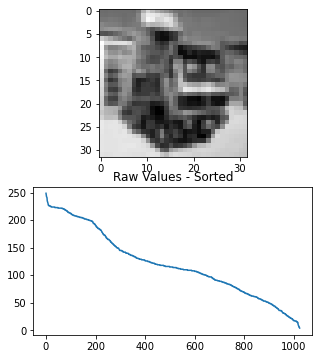

In [10]:
# testing validity of np arrays
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,6))

random_int = np.random.randint(50000)

img = image_matrices[random_int]
rank = np.linalg.matrix_rank(img, tol=50)
axs[0].imshow(img, cmap='gray') # plot image onto 
#rank
axs[1].set_title('Raw Values - Sorted')
axs[1].plot(np.sort(img.flatten())[::-1])

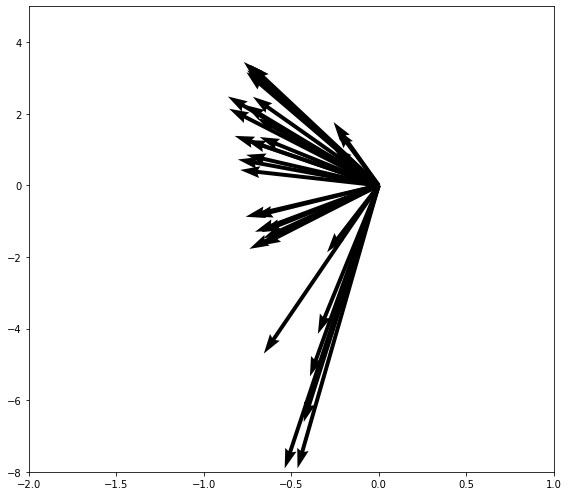

In [74]:
test_image_U[0].shape
#origin = np.array([[0, 0, 0],[0, 0, 0]])
origin = np.zeros((32,2));
plt.figure(figsize=(8,7))
plt.quiver(origin[:,0], origin[:,1],test_image_U[0][:,0], test_image_U[0][:,1], scale=0.8)

plt.xlim(-2,1)
plt.ylim(-8,5)
plt.show()

In [35]:
origin.shape

(2, 3)

In [75]:
# creating subclass to create dataset for training
class CifarDataset(torch.utils.data.Dataset):
    def __init__(self, images, U_values):
        self.X = images
        self.Y = U_values
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]
    def __len__(self):
        return len(self.X)


In [76]:
class RegressorModule(nn.Module):
    def __init__(self, num_units=5000, nonlin=F.relu): # why this param list
        super(RegressorModule, self).__init__()
        self.num_units = num_units
        self.nonlin = nonlin

        self.dense0 = nn.Linear(1024, num_units)
        #self.dropout0 = nn.Dropout(0.7)
        self.dense1 = nn.Linear(num_units,750)
        self.dropout = nn.Dropout(0.7)
        self.dense2 = nn.Linear(750, 300)
        self.dropout2 = nn.Dropout(0.7)
        self.dense3 = nn.Linear(300, 100)
        self.output = nn.Linear(100, 1024)

    def forward (self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        #X = self.dropout0(X)
        X = self.nonlin(self.dense1(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense2(X))
        X = self.dropout2(X)
        X = self.nonlin(self.dense3(X))
        X = self.nonlin(self.output(X))
        #X = F.softmax(self.output(X), dim=-1)
        return X

net = NeuralNetRegressor(
    RegressorModule, # pytorch module
    #train_split=None,
    criterion = nn.L1Loss, 
    max_epochs=512,
    lr=0.0001,
    device='cuda',
)

In [77]:
image_matrices[0]

array([[ 59.,  43.,  50., ..., 158., 152., 148.],
       [ 16.,   0.,  18., ..., 123., 119., 122.],
       [ 25.,  16.,  49., ..., 118., 120., 109.],
       ...,
       [208., 201., 198., ..., 160.,  56.,  53.],
       [180., 173., 186., ..., 184.,  97.,  83.],
       [177., 168., 179., ..., 216., 151., 123.]])

In [80]:
flattened = np.reshape(image_matrices, (50000, 1024))
flattened = flattened.astype(np.float32)
image_U_flattened = np.reshape(image_U, (50000, 1024)).astype(np.float32)

(1024,)

In [82]:
train_data = CifarDataset(images=flattened, U_values=image_U_flattened)
#net.fit(X=train_data[:][0],y=train_data[:][1])
net.fit(train_data, None)
# for the future, use dataloader

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.7638        0.1629  4.0435
      2        0.2161        0.1508  1.1752
      3        0.1779        0.1481  1.2168
      4        0.1658        0.1469  1.1876
      5        0.1600        0.1463  1.1931
      6        0.1566        0.1459  1.1772
      7        0.1545        0.1457  1.1822
      8        0.1529        0.1455  1.1838
      9        0.1518        0.1453  1.1866
     10        0.1510        0.1452  1.1780
     11        0.1502        0.1451  1.1777
     12        0.1497        0.1451  1.1687
     13        0.1492        0.1450  1.1634
     14        0.1487        0.1450  1.1630
     15        0.1484        0.1449  1.1563
     16        0.1481        0.1449  1.1726
     17        0.1479        0.1448  1.1895
     18        0.1476        0.1448  1.1730
     19        0.1475        0.1448  1.1909
     20        0.1473        0.1448  1.1897
     21        0.1472        0.1

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=RegressorModule(
    (dense0): Linear(in_features=1024, out_features=5000, bias=True)
    (dense1): Linear(in_features=5000, out_features=750, bias=True)
    (dropout): Dropout(p=0.7, inplace=False)
    (dense2): Linear(in_features=750, out_features=300, bias=True)
    (dropout2): Dropout(p=0.7, inplace=False)
    (dense3): Linear(in_features=300, out_features=100, bias=True)
    (output): Linear(in_features=100, out_features=1024, bias=True)
  ),
)

In [83]:
net.save_params(f_params='models/cifar-10-U-model.pkl')

## Visualization

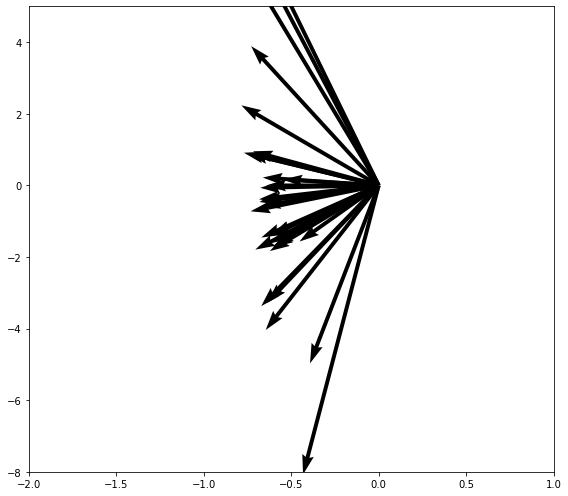

In [133]:
test_image_U[0].shape
#origin = np.array([[0, 0, 0],[0, 0, 0]])
origin = np.zeros((32,2));
plt.figure(figsize=(8,7))
plt.quiver(origin[:,0], origin[:,1],test_image_U[5255][:,0], test_image_U[5255][:,1], scale=0.8)

plt.xlim(-2,1)
plt.ylim(-8,5)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing

In [94]:
#testing = CifarDataset(test_image_matrices,test_)
testing = np.reshape(test_image_matrices, (10000, 1024))
testing = testing.astype(np.float32)
test_U = test_image_U.reshape(10000,1024)
y_pred = net.predict(testing)

In [130]:
test_image_U.shape


(10000, 32, 32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


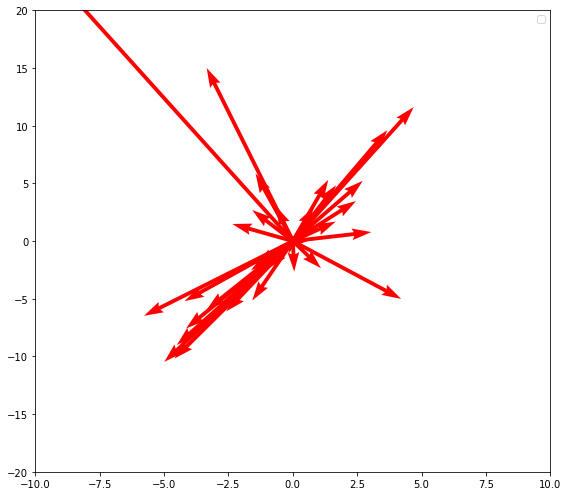

In [148]:
randint = np.random.randint(10000)

x = (y_pred[randint][:])
y_pred = y_pred.reshape(10000,32,32)
#x = np.sort(x)[::-1]
##plt.semilogy(x, label='Predicted')
#plt.semilogy(test_image_singular[randint][:], label='True')


#origin = np.zeros((320000,2))

origin = np.zeros((32,2))
plt.figure(figsize=(8,7))
plt.quiver(origin[:,0], origin[:,1],test_image_U[0:1][:,0], test_image_U[0:1][:,1], scale=1, color=['r'])
#plt.quiver(origin[:,0], origin[:,1],y_pred[:,0], y_pred[:,1], scale=0.8, color=['g'])
plt.legend()
plt.xlim(-10,10)
plt.ylim(-20,20)
plt.show()


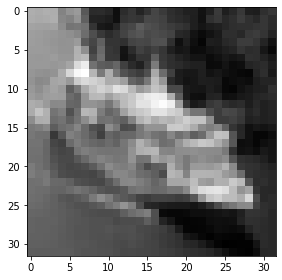

In [211]:
randint = np.random.randint(10000)
test_mat = y_pred[randint] @ np.diag(test_image_singular[randint]) @ test_image_V[randint]
#g_img = test_mat.convert('LA')
plt.figure(figsize=(6, 4))
plt.imshow(test_mat, cmap='gray') # plot image onto 


In [ ]:
torch.save(RegressorModule,'models/singular_model_nodrop.pkl')
net.save_params(f_params='models/singular_trained_nodrop.pkl')

In [197]:
test_mat

array([[ 83.,  85.,  87., ..., 108., 106., 105.],
       [ 90.,  91.,  92., ..., 119., 117., 116.],
       [105., 105., 101., ..., 130., 128., 126.],
       ...,
       [137., 116., 114., ..., 163., 152., 139.],
       [155., 128., 122., ..., 146., 142., 139.],
       [139., 116., 119., ..., 154., 151., 141.]])